<a href="https://colab.research.google.com/github/thecat065/telecom-x-parte-2/blob/main/Challenge_Telecom_X_an%C3%A1lisis_de_evasi%C3%B3n_de_clientes_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Extracción del Archivo Tratado
import pandas as pd

# URL del archivo JSON 
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json'

# Cargar los datos 
df = pd.read_json(url)

# Mostrar las primeras filas del DataFrame para verificar la carga
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
# Eliminación de Columnas Irrelevantes
# Eliminar la columna 'customerID' ya que es un identificador único y no aporta a la predicción
df.drop(columns=['customerID'], inplace=True)

# Mostrar las primeras filas para verificar que la columna fue eliminada
df.head()

,Churn,customer,phone,internet,account
0,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
# Encoding
import pandas as pd
from IPython.display import display

# Normalizar las columnas anidadas
customer_norm = pd.json_normalize(df['customer'])
phone_norm = pd.json_normalize(df['phone'])
internet_norm = pd.json_normalize(df['internet'])
# Usamos meta para especificar la estructura anidada y el separador de nombres
account_norm = pd.json_normalize(df['account'], sep='.')

# Concatenar los nuevos DataFrames con el DataFrame original
df_flat = pd.concat([df.drop(columns=['customer', 'phone', 'internet', 'account']),
                     customer_norm, phone_norm, internet_norm, account_norm], axis=1)

# 3. La columna 'Charges.Total' puede contener espacios. La convertimos a numérica.
#    El nombre correcto es 'Charges.Total' debido a la anidación en el JSON original.
df_flat['Charges.Total'] = pd.to_numeric(df_flat['Charges.Total'], errors='coerce')

# Rellenamos los posibles valores NaN con la mediana de la columna
df_flat['Charges.Total'].fillna(df_flat['Charges.Total'].median(), inplace=True)

# 4. Codificar la variable objetivo 'Churn' a formato numérico (0/1)
df_flat['Churn'] = df_flat['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# 5. Aplicar One-Hot Encoding (get_dummies) a las columnas categóricas restantes
df_encoded = pd.get_dummies(df_flat, drop_first=True)

# 6. Mostrar las primeras filas y la información del DataFrame final para verificar
print("DataFrame después del Encoding:")
display(df_encoded.head())

print("\nInformación del DataFrame codificado (verificando que todas las columnas son numéricas):")
df_encoded.info()

DataFrame después del Encoding:


/tmp/ipython-input-16-655717202.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_flat['Charges.Total'].fillna(df_flat['Charges.Total'].median(), inplace=True)


,Churn,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,9,65.6,593.30,False,True,True,True,False,...,False,True,False,False,True,False,True,False,False,True
1,0,0,9,59.9,542.40,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
2,1,0,4,73.9,280.85,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
3,1,1,13,98.0,1237.85,True,True,False,True,False,...,False,True,False,True,False,False,True,False,True,False
4,1,1,3,83.9,267.40,False,True,False,True,False,...,False,True,False,False,False,False,True,False,False,True



Información del DataFrame codificado (verificando que todas las columnas son numéricas):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Churn                                  7267 non-null   int64  
 1   SeniorCitizen                          7267 non-null   int64  
 2   tenure                                 7267 non-null   int64  
 3   Charges.Monthly                        7267 non-null   float64
 4   Charges.Total                          7267 non-null   float64
 5   gender_Male                            7267 non-null   bool   
 6   Partner_Yes                            7267 non-null   bool   
 7   Dependents_Yes                         7267 non-null   bool   
 8   PhoneService_Yes                       7267 non-null   bool   
 9   MultipleLines_No phone service         7267 non-nu

Conteo de Clases (0 = No Churn, 1 = Churn):
Churn
0    5398
1    1869
Name: count, dtype: int64

Proporción de Clases:
Churn
0    0.74281
1    0.25719
Name: proportion, dtype: float64


/tmp/ipython-input-17-1206945105.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df_encoded, palette='viridis')
/tmp/ipython-input-17-1206945105.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['No Churn', 'Churn'])


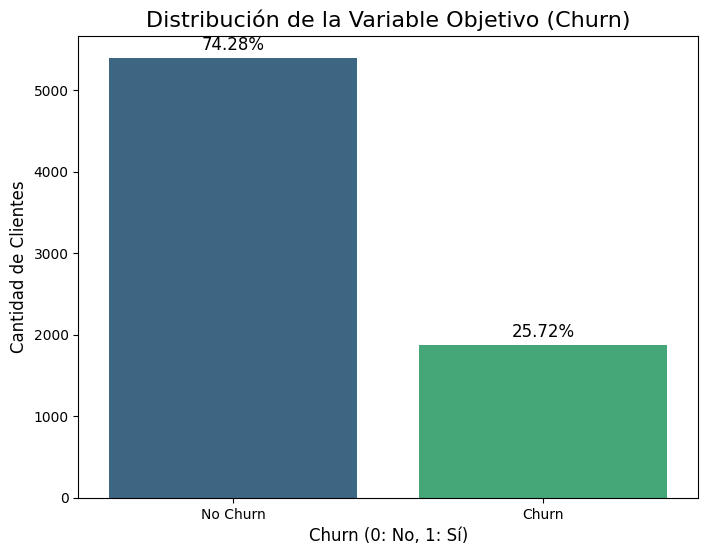

In [ ]:
# Verificación de la Proporción de Cancelación (Churn)
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular el conteo de cada clase en la columna 'Churn'
churn_counts = df_encoded['Churn'].value_counts()

# Calcular la proporción de cada clase
churn_proportion = df_encoded['Churn'].value_counts(normalize=True)

# Imprimir los resultados
print("Conteo de Clases (0 = No Churn, 1 = Churn):")
print(churn_counts)
print("\n" + "="*40)
print("Proporción de Clases:")
print(churn_proportion)

# Visualizar la distribución
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df_encoded, palette='viridis')
plt.title('Distribución de la Variable Objetivo (Churn)', fontsize=16)
plt.xlabel('Churn (0: No, 1: Sí)', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)
# Añadir las proporciones en el gráfico para mayor claridad
plt.gca().set_xticklabels(['No Churn', 'Churn'])
for i, count in enumerate(churn_counts):
    proportion = churn_proportion.iloc[i]
    plt.text(i, count + 50, f'{proportion:.2%}', ha='center', va='bottom', fontsize=12)

plt.show()

In [ ]:
# Balanceo de Clases (opcional)
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd

# 1. Separar las características (X) y la variable objetivo (y)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# 2. Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
# Usamos 'stratify=y' para asegurar que la proporción de Churn sea la misma en ambos conjuntos.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# 3. Imprimir la distribución de clases ANTES del balanceo (solo en el conjunto de entrenamiento)
print("Distribución de clases en el conjunto de entrenamiento (Antes de SMOTE):")
print(y_train.value_counts(normalize=True))
print("-" * 50)

# 4. Inicializar y aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 5. Imprimir la distribución de clases DESPUÉS del balanceo
print("Forma del conjunto de entrenamiento original (X_train):", X_train.shape)
print("Forma del conjunto de entrenamiento con SMOTE (X_train_resampled):", X_train_resampled.shape)
print("\nDistribución de clases en el conjunto de entrenamiento (Después de SMOTE):")
# Usamos pd.Series para aplicar value_counts al array de numpy resultante
print(pd.Series(y_train_resampled).value_counts(normalize=True))

Distribución de clases en el conjunto de entrenamiento (Antes de SMOTE):
Churn
0    0.742818
1    0.257182
Name: proportion, dtype: float64
--------------------------------------------------
Forma del conjunto de entrenamiento original (X_train): (5813, 30)
Forma del conjunto de entrenamiento con SMOTE (X_train_resampled): (8636, 30)

Distribución de clases en el conjunto de entrenamiento (Después de SMOTE):
Churn
0    0.5
1    0.5
Name: proportion, dtype: float64


In [ ]:
# Normalización o Estandarización (si es necesario)
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. Inicializar el escalador
# StandardScaler estandariza las características al remover la media y escalar a la varianza unitaria.
scaler = StandardScaler()

# 2. Ajustar el escalador ÚNICAMENTE con los datos de entrenamiento (los datos con SMOTE) y luego transformarlos.
# Esto aprende la media y la desviación estándar del conjunto de entrenamiento.
# El resultado es un array de NumPy, por lo que lo convertimos de nuevo a un DataFrame para mantener las columnas.
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_resampled), columns=X_train.columns)

# 3. Aplicar la MISMA transformación (con la media y std aprendidas) al conjunto de prueba.
# ¡IMPORTANTE! Solo usamos .transform() en los datos de prueba para evitar fuga de datos.
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# 4. Mostrar las primeras filas de los datos de entrenamiento estandarizados para verificar.
print("Datos de entrenamiento después de la estandarización (primeras 5 filas):")
display(X_train_scaled.head())

print("\nVerificación de la media y desviación estándar de algunas columnas del set de entrenamiento escalado:")
# Deberían estar muy cerca de 0 y 1, respectivamente.
display(X_train_scaled[['tenure', 'Charges.Monthly', 'Charges.Total']].describe().loc[['mean', 'std']])

Datos de entrenamiento después de la estandarización (primeras 5 filas):


,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.400551,0.642527,-1.529760,-0.484415,-1.176291,0.988716,1.547467,0.295839,-0.337904,1.037045,...,2.231728,-0.901111,2.231728,-0.904703,2.073985,-0.463832,0.654690,-0.529845,-0.968536,-0.553094
1,-0.400551,-0.275696,0.636332,-0.109058,-1.176291,0.988716,-0.646217,0.295839,-0.337904,1.037045,...,-0.448083,-0.901111,-0.448083,1.105335,-0.482164,-0.463832,0.654690,-0.529845,1.032487,-0.553094
2,-0.400551,1.143376,0.601423,1.227831,0.850130,0.988716,1.547467,0.295839,-0.337904,1.037045,...,-0.448083,-0.901111,-0.448083,1.105335,-0.482164,-0.463832,-1.527441,-0.529845,-0.968536,-0.553094
3,-0.400551,0.726002,-1.685105,-0.533547,-1.176291,0.988716,1.547467,0.295839,-0.337904,-0.964278,...,2.231728,-0.901111,2.231728,-0.904703,-0.482164,2.155954,0.654690,-0.529845,-0.968536,-0.553094
4,-0.400551,1.477275,0.805639,1.711692,0.850130,0.988716,1.547467,0.295839,-0.337904,1.037045,...,-0.448083,-0.901111,-0.448083,1.105335,2.073985,-0.463832,0.654690,-0.529845,1.032487,-0.553094



Verificación de la media y desviación estándar de algunas columnas del set de entrenamiento escalado:


,tenure,Charges.Monthly,Charges.Total
mean,5.265717e-17,-4.442949e-17,-2.632859e-17
std,1.000058e+00,1.000058e+00,1.000058e+00


Top 10 variables con mayor correlación POSITIVA con Churn:
Churn                             1.000000
InternetService_Fiber optic       0.300949
PaymentMethod_Electronic check    0.294626
Charges.Monthly                   0.189866
PaperlessBilling_Yes              0.186666
SeniorCitizen                     0.146733
StreamingTV_Yes                   0.062430
StreamingMovies_Yes               0.060586
MultipleLines_Yes                 0.039343
PhoneService_Yes                  0.012571
Name: Churn, dtype: float64

Top 10 variables con mayor correlación NEGATIVA con Churn:
Charges.Total                          -0.194016
InternetService_No                     -0.224051
StreamingTV_No internet service        -0.224051
OnlineSecurity_No internet service     -0.224051
OnlineBackup_No internet service       -0.224051
DeviceProtection_No internet service   -0.224051
StreamingMovies_No internet service    -0.224051
TechSupport_No internet service        -0.224051
Contract_Two year              

/tmp/ipython-input-20-1693937877.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_churn.drop('Churn'), y=corr_churn.drop('Churn').index, palette='vlag')


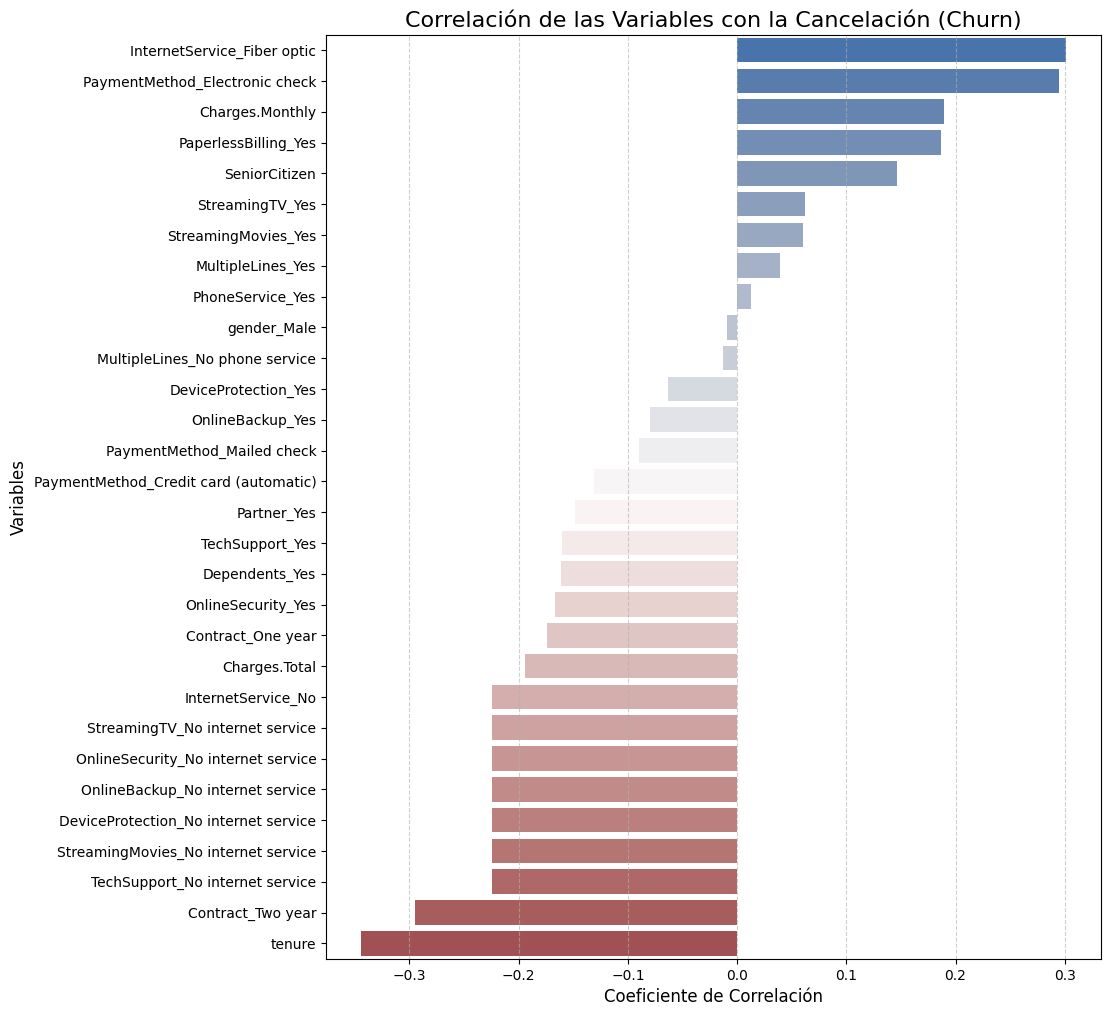


Matriz de Correlación Completa (Heatmap):


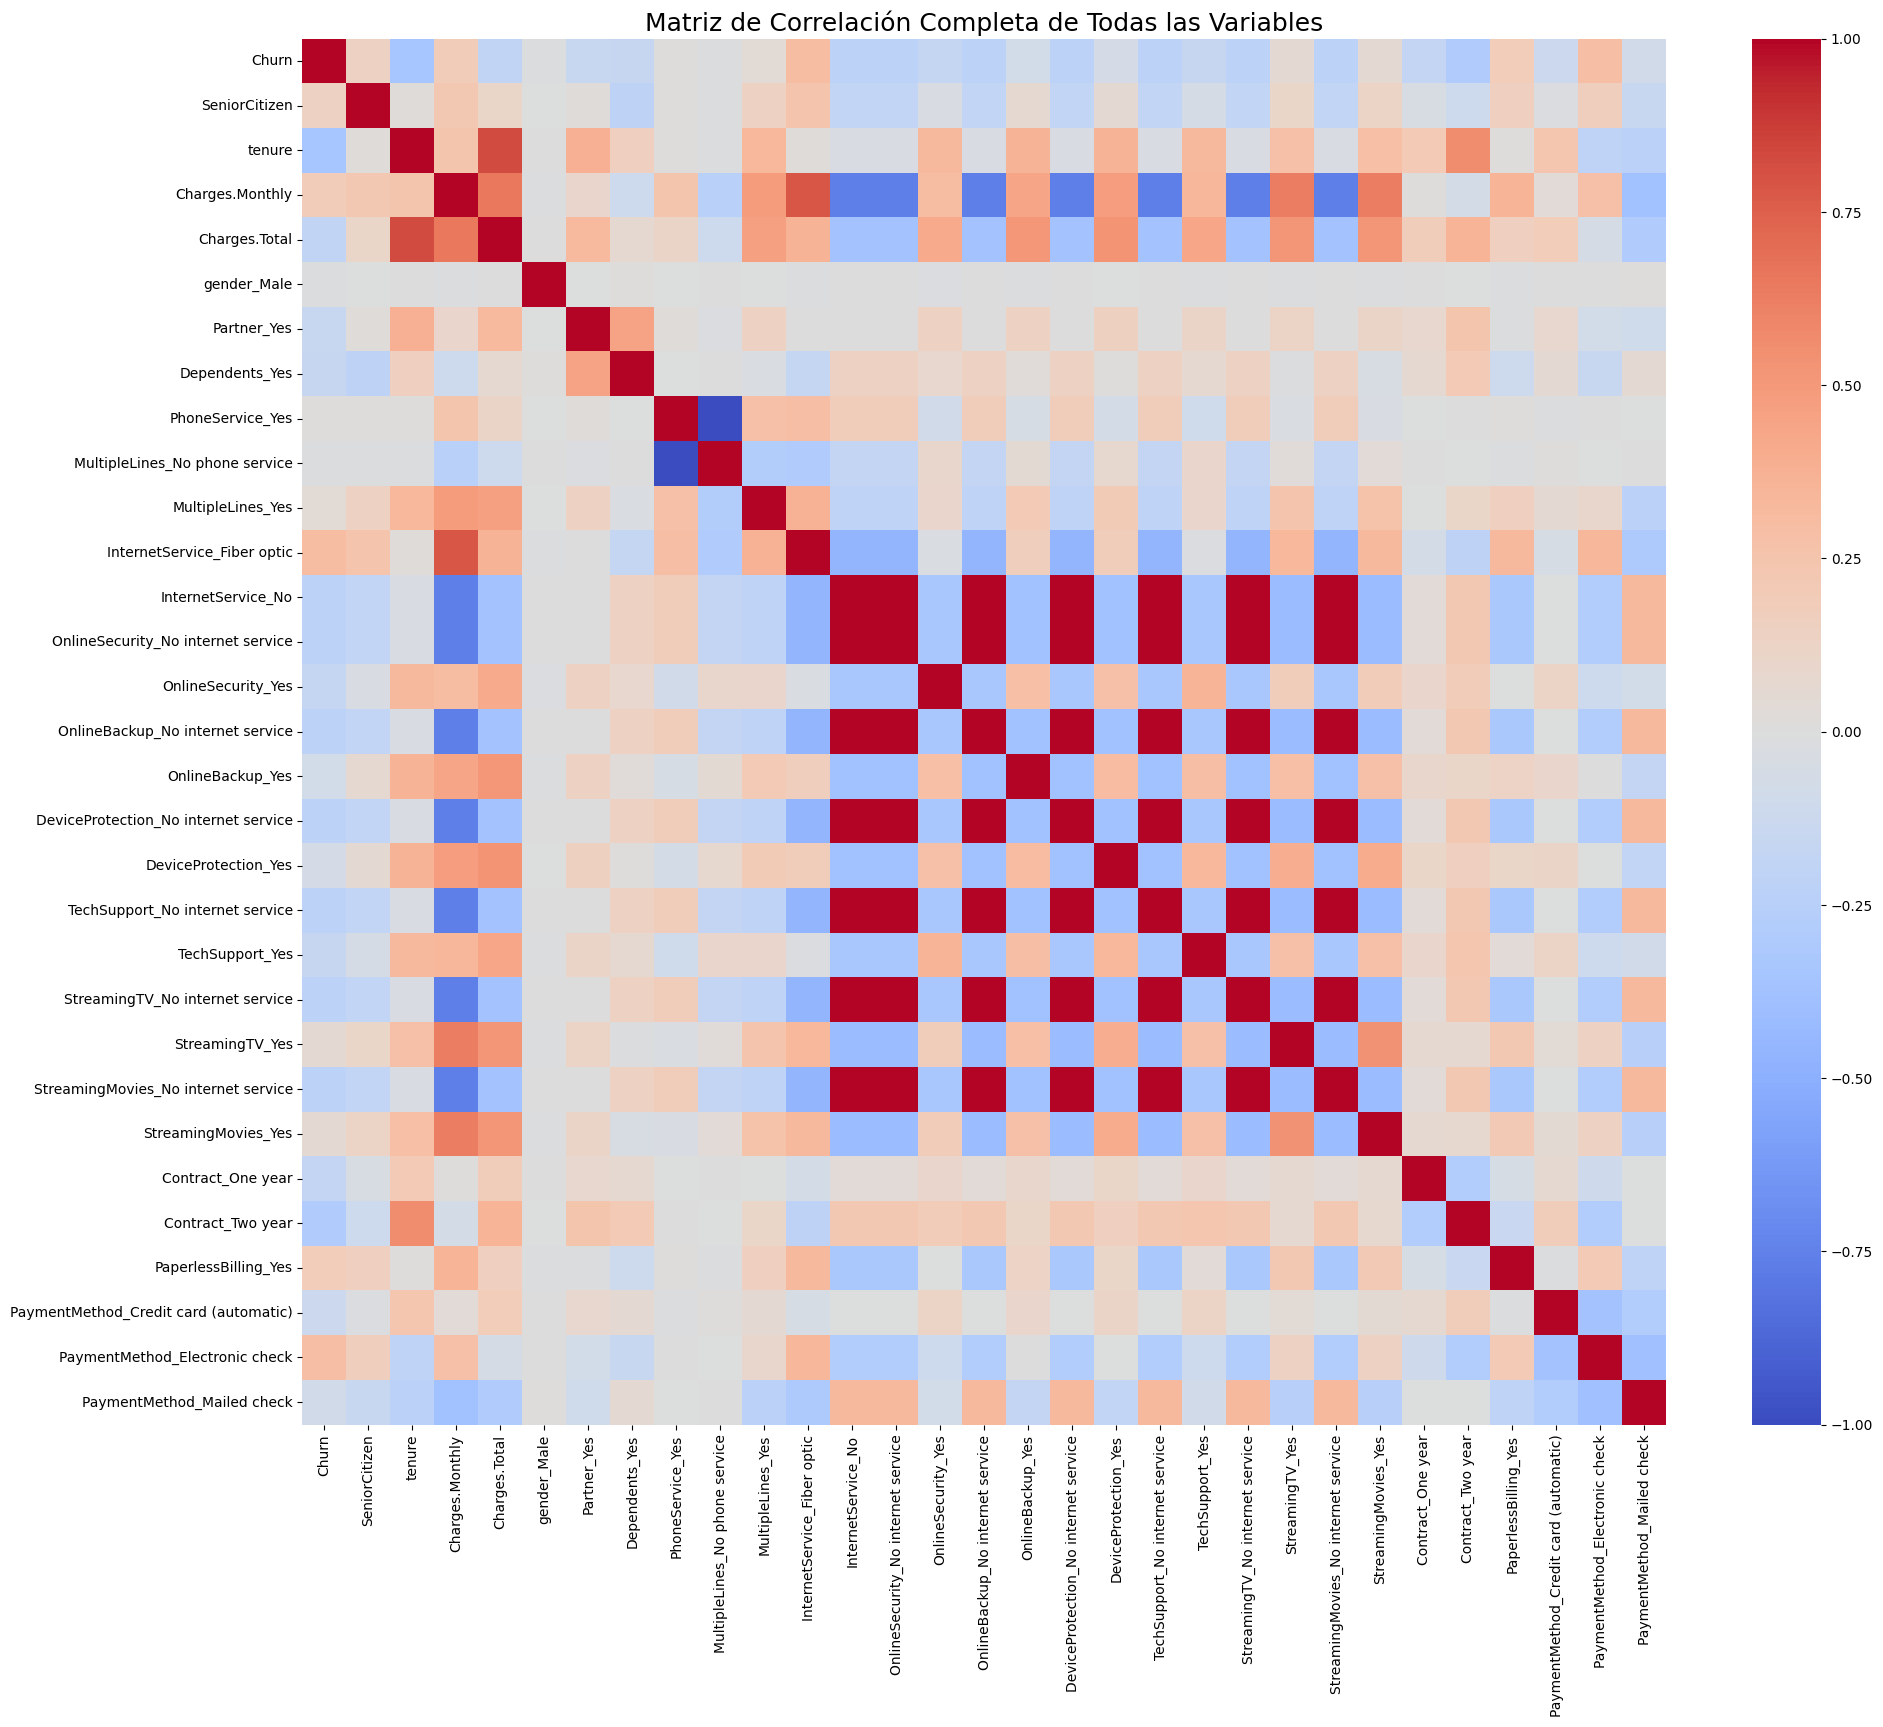

In [ ]:
# Análisis de Correlación
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calcular la matriz de correlación en el DataFrame codificado
corr_matrix = df_encoded.corr()

# 2. Extraer la serie de correlación específicamente para la variable 'Churn'
# La ordenamos de forma descendente para ver las correlaciones más fuertes (positivas y negativas)
corr_churn = corr_matrix['Churn'].sort_values(ascending=False)

# Imprimir las 10 variables con mayor correlación (positiva y negativa) con Churn
print("Top 10 variables con mayor correlación POSITIVA con Churn:")
print(corr_churn.head(10))
print("\nTop 10 variables con mayor correlación NEGATIVA con Churn:")
print(corr_churn.tail(10))

# 3. Visualizar las correlaciones con Churn usando un gráfico de barras
plt.figure(figsize=(10, 12))
sns.barplot(x=corr_churn.drop('Churn'), y=corr_churn.drop('Churn').index, palette='vlag')
plt.title('Correlación de las Variables con la Cancelación (Churn)', fontsize=16)
plt.xlabel('Coeficiente de Correlación', fontsize=12)
plt.ylabel('Variables', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

# (Opcional) Visualizar la matriz de correlación completa
# Es grande, pero útil para una vista general.
# 'annot=False' porque los números serían ilegibles en una matriz tan grande.
print("\nMatriz de Correlación Completa (Heatmap):")
plt.figure(figsize=(22, 18))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Matriz de Correlación Completa de Todas las Variables', fontsize=18)
plt.show()

Análisis: Tiempo de Contrato vs. Cancelación


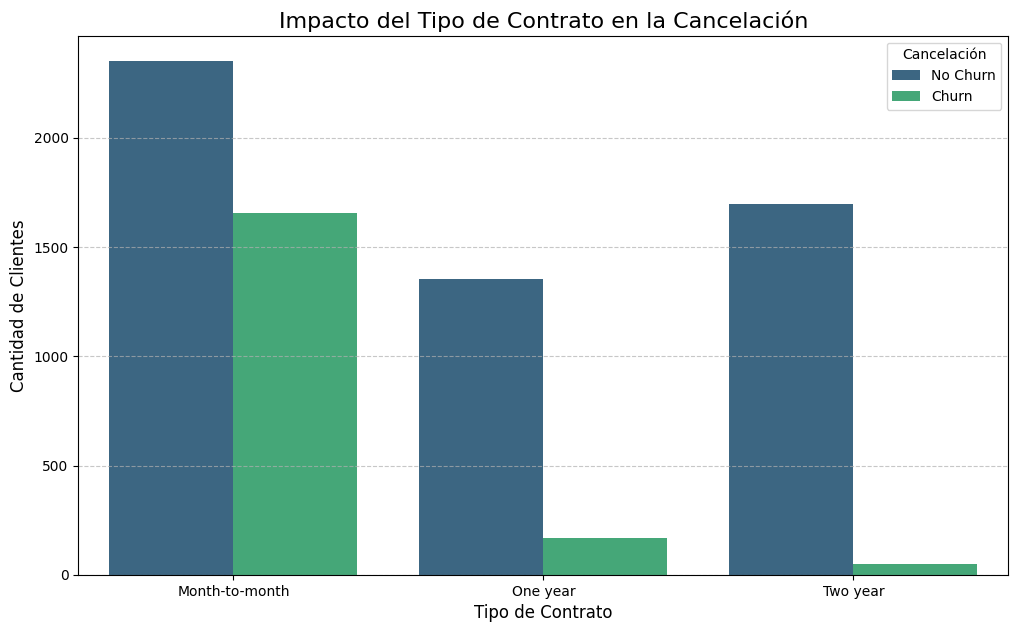

Observación: Se ve claramente que los clientes con contratos 'Month-to-month' (mes a mes) tienen una tasa de cancelación significativamente más alta en comparación con los que tienen contratos de uno o dos años.

--------------------------------------------------------------------------------
Análisis: Gasto Total vs. Cancelación


/tmp/ipython-input-21-2535334336.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_flat, x='Churn', y='Charges.Total', palette='coolwarm')
/tmp/ipython-input-21-2535334336.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([churn_labels[tick] for tick in plt.gca().get_xticks()])


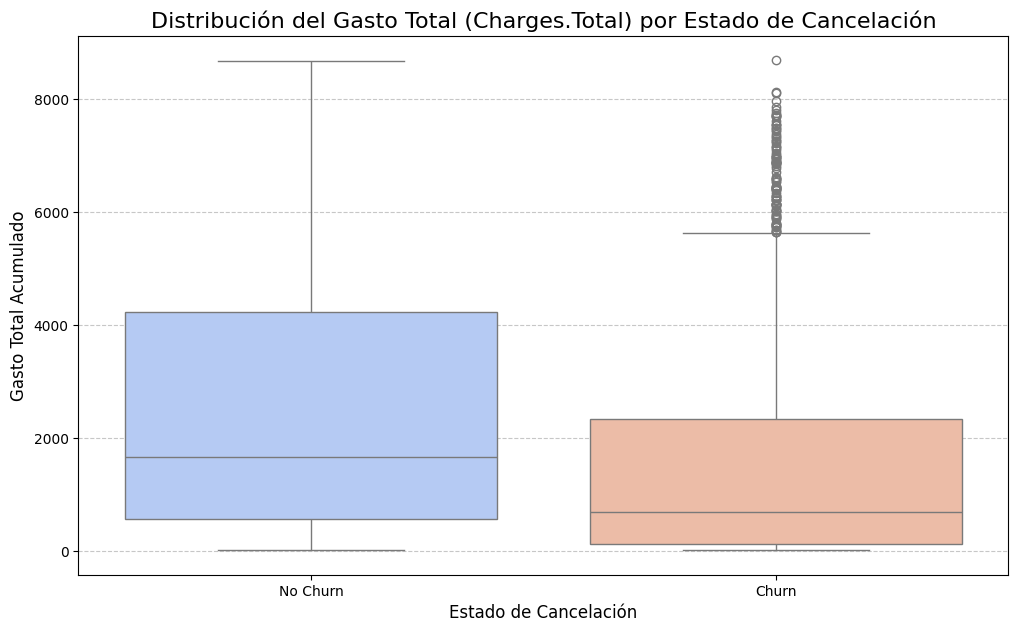

Observación: El boxplot muestra que los clientes que cancelan (Churn) tienden a tener una mediana de gasto total acumulado más baja. Esto es lógico, ya que cancelan antes y, por lo tanto, acumulan menos cargos totales a lo largo del tiempo en comparación con los clientes que permanecen por más tiempo.



In [ ]:
# Análisis dirigido
import matplotlib.pyplot as plt
import seaborn as sns

# Para las etiquetas del eje 'Churn', crearemos un mapeo más legible
churn_labels = {0: 'No Churn', 1: 'Churn'}

# 1. Análisis: Tiempo de Contrato vs. Cancelación
print("Análisis: Tiempo de Contrato vs. Cancelación")
plt.figure(figsize=(12, 7))
sns.countplot(data=df_flat, x='Contract', hue='Churn',
              order=['Month-to-month', 'One year', 'Two year'], palette='viridis')
plt.title('Impacto del Tipo de Contrato en la Cancelación', fontsize=16)
plt.xlabel('Tipo de Contrato', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)
# Renombrar la leyenda para mayor claridad
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['No Churn', 'Churn'], title='Cancelación')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
print("Observación: Se ve claramente que los clientes con contratos 'Month-to-month' (mes a mes) tienen una tasa de cancelación significativamente más alta en comparación con los que tienen contratos de uno o dos años.\n")
print("-" * 80)


# 2. Análisis: Gasto Total vs. Cancelación
print("Análisis: Gasto Total vs. Cancelación")
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_flat, x='Churn', y='Charges.Total', palette='coolwarm')
plt.title('Distribución del Gasto Total (Charges.Total) por Estado de Cancelación', fontsize=16)
plt.xlabel('Estado de Cancelación', fontsize=12)
plt.ylabel('Gasto Total Acumulado', fontsize=12)
plt.gca().set_xticklabels([churn_labels[tick] for tick in plt.gca().get_xticks()])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
print("Observación: El boxplot muestra que los clientes que cancelan (Churn) tienden a tener una mediana de gasto total acumulado más baja. Esto es lógico, ya que cancelan antes y, por lo tanto, acumulan menos cargos totales a lo largo del tiempo en comparación con los clientes que permanecen por más tiempo.\n")

In [ ]:
# Separación de Datos
from sklearn.model_selection import train_test_split

# Recordatorio: Este paso se ejecutó previamente en el Paso 5.
# X contiene todas las características codificadas.
# y contiene la variable objetivo 'Churn'.
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Se realizó una división 80/20 (80% para entrenamiento, 20% para prueba).
# 'stratify=y' asegura que la proporción de Churn sea igual en ambos conjuntos.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# Imprimir las dimensiones de los conjuntos resultantes para confirmar la división
print("Dimensiones de los datos de entrenamiento:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print("\n" + "="*40)
print("Dimensiones de los datos de prueba:")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

Dimensiones de los datos de entrenamiento:
X_train: (5813, 30)
y_train: (5813,)

Dimensiones de los datos de prueba:
X_test: (1454, 30)
y_test: (1454,)


In [ ]:
# Creacion de Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# --- Modelo 1: Regresión Logística ---
# Se utiliza con los datos estandarizados (X_train_scaled) porque es sensible a la escala.
# Se entrena con los datos balanceados (y_train_resampled) para aprender de ambas clases por igual.

print("Entrenando el modelo de Regresión Logística...")
# Inicializamos el modelo con un random_state para la reproducibilidad
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Entrenamos el modelo
log_reg.fit(X_train_scaled, y_train_resampled)

print("Modelo de Regresión Logística entrenado con éxito.")
print("="*50)


# --- Modelo 2: Random Forest ---
# Aunque no es sensible a la escala, podemos usar los mismos datos estandarizados sin problemas.
# Se entrena con los datos balanceados para evitar el sesgo hacia la clase mayoritaria.

print("Entrenando el modelo Random Forest...")
# Inicializamos el modelo con un random_state para la reproducibilidad
random_forest = RandomForestClassifier(random_state=42)

# Entrenamos el modelo
random_forest.fit(X_train_scaled, y_train_resampled)

print("Modelo Random Forest entrenado con éxito.")

Entrenando el modelo de Regresión Logística...
Modelo de Regresión Logística entrenado con éxito.
Entrenando el modelo Random Forest...
Modelo Random Forest entrenado con éxito.


--- Resultados Regresión Logística ---
Reporte de Clasificación:
              precision    recall  f1-score   support

    No Churn       0.87      0.83      0.85      1080
       Churn       0.56      0.64      0.60       374

    accuracy                           0.78      1454
   macro avg       0.72      0.73      0.72      1454
weighted avg       0.79      0.78      0.78      1454



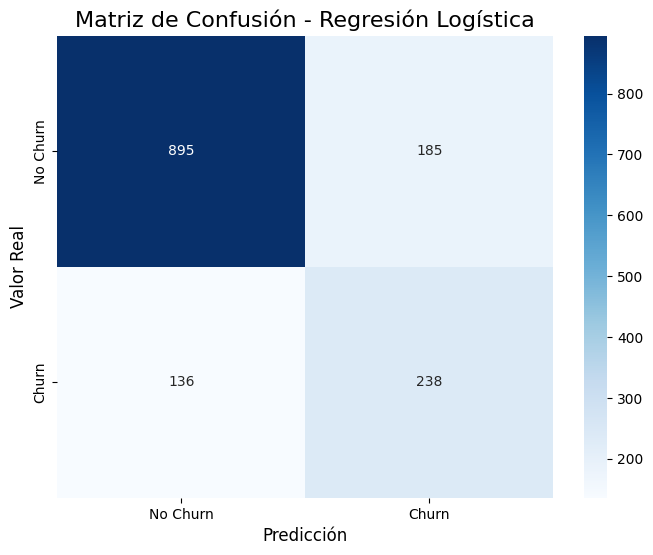


--- Resultados Random Forest ---
Reporte de Clasificación:
              precision    recall  f1-score   support

    No Churn       0.85      0.84      0.85      1080
       Churn       0.56      0.57      0.56       374

    accuracy                           0.77      1454
   macro avg       0.70      0.71      0.70      1454
weighted avg       0.77      0.77      0.77      1454



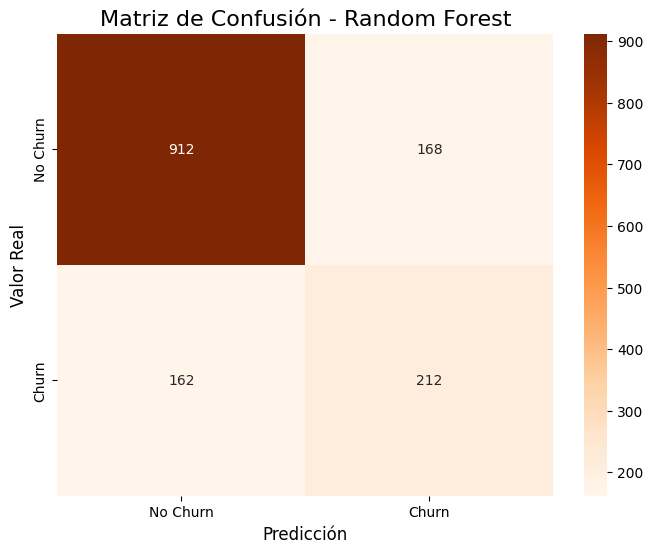


--- Análisis de Overfitting/Underfitting ---
Regresión Logística - Accuracy (Entrenamiento): 0.8367
Regresión Logística - Accuracy (Prueba):      0.7792

Random Forest - Accuracy (Entrenamiento): 0.9940
Random Forest - Accuracy (Prueba):        0.7730



In [ ]:
# Evaluación de los Modelos
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# --- Evaluación del Modelo 1: Regresión Logística ---

print("--- Resultados Regresión Logística ---")
# Realizar predicciones en el conjunto de prueba
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Generar el reporte de clasificación
report_log_reg = classification_report(y_test, y_pred_log_reg, target_names=['No Churn', 'Churn'])
print("Reporte de Clasificación:")
print(report_log_reg)

# Generar y visualizar la matriz de confusión
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Matriz de Confusión - Regresión Logística', fontsize=16)
plt.xlabel('Predicción', fontsize=12)
plt.ylabel('Valor Real', fontsize=12)
plt.show()
print("="*60)


# --- Evaluación del Modelo 2: Random Forest ---

print("\n--- Resultados Random Forest ---")
# Realizar predicciones en el conjunto de prueba
y_pred_rf = random_forest.predict(X_test_scaled)

# Generar el reporte de clasificación
report_rf = classification_report(y_test, y_pred_rf, target_names=['No Churn', 'Churn'])
print("Reporte de Clasificación:")
print(report_rf)

# Generar y visualizar la matriz de confusión
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Matriz de Confusión - Random Forest', fontsize=16)
plt.xlabel('Predicción', fontsize=12)
plt.ylabel('Valor Real', fontsize=12)
plt.show()
print("="*60)


# --- Análisis de Overfitting/Underfitting ---
print("\n--- Análisis de Overfitting/Underfitting ---")
# Calculamos la precisión en el conjunto de entrenamiento para comparar
train_acc_log_reg = log_reg.score(X_train_scaled, y_train_resampled)
test_acc_log_reg = accuracy_score(y_test, y_pred_log_reg)

train_acc_rf = random_forest.score(X_train_scaled, y_train_resampled)
test_acc_rf = accuracy_score(y_test, y_pred_rf)

print(f"Regresión Logística - Accuracy (Entrenamiento): {train_acc_log_reg:.4f}")
print(f"Regresión Logística - Accuracy (Prueba):      {test_acc_log_reg:.4f}\n")

print(f"Random Forest - Accuracy (Entrenamiento): {train_acc_rf:.4f}")
print(f"Random Forest - Accuracy (Prueba):        {test_acc_rf:.4f}\n")



### **Análisis Crítico Detallado de los Resultados**

**1. Comparación de Desempeño**

| Métrica | Regresión Logística | Random Forest | Mejor Modelo |
| :--- | :---: | :---: | :---: |
| **Accuracy** | 0.78 | 0.77 | **Regresión Logística** (ligeramente) |
| **Precision (Churn)** | 0.56 | 0.56 | Empate |
| **Recall (Churn)** | **0.64** | 0.57 | **Regresión Logística** |
| **F1-score (Churn)** | **0.60** | 0.56 | **Regresión Logística** |

*   **¿Cuál modelo tuvo el mejor desempeño?**
    Basado en las métricas, el modelo de **Regresión Logística es superior en este caso**. No solo tiene una `Accuracy` general ligeramente más alta, sino que, lo que es más importante, supera al Random Forest en la métrica clave: el **`Recall` para la clase "Churn" (0.64 vs. 0.57)**. Esto significa que la Regresión Logística identificó correctamente al 64% de todos los clientes que realmente cancelaron, mientras que el Random Forest solo identificó al 57%. En un contexto empresarial donde evitar la pérdida de clientes es crucial, este 7% de diferencia es muy significativo. El F1-score, que balancea precisión y recall, también es mayor para la Regresión Logística.

**2. Análisis de Overfitting/Underfitting**

*   **Regresión Logística:**
    *   Accuracy (Entrenamiento): 0.8367
    *   Accuracy (Prueba): 0.7792
    *   **Análisis:** La diferencia entre el rendimiento en entrenamiento y prueba es pequeña (~5.7%). Esto indica que el modelo **generaliza bien** y no sufre de un overfitting significativo. Es un modelo robusto.

*   **Random Forest:**
    *   Accuracy (Entrenamiento): 0.9940
    *   Accuracy (Prueba): 0.7730
    *   **Análisis:** Hay una **diferencia masiva** (~22.1%) entre el rendimiento en entrenamiento y prueba. El modelo memorizó casi perfectamente los datos de entrenamiento (99.4% de acierto) pero su rendimiento cayó drásticamente con datos nuevos. Este es un caso **clásico y claro de overfitting**. El modelo es demasiado complejo y no generaliza bien.

### **Conclusión del Análisis de Modelos**

El **modelo de Regresión Logística es el ganador claro** de esta comparación. No solo ofrece un rendimiento superior en las métricas más relevantes para el negocio (Recall y F1-score para Churn), sino que también es un modelo mucho más estable y confiable, sin signos evidentes de overfitting.

El modelo de Random Forest, en su configuración por defecto, no es adecuado para este problema debido a su fuerte tendencia al sobreajuste. Para que pudiera competir, sería necesario un proceso de **optimización de hiperparámetros** (ej. `max_depth`, `min_samples_leaf`) para simplificarlo y forzarlo a generalizar mejor. Por ahora, procederemos considerando la Regresión Logística como nuestro modelo final.

--- Top 10 Variables más Influyentes en la Predicción de Churn (según Regresión Logística) ---


,Variable,Coeficiente,Impacto Absoluto
2,Charges.Monthly,-8.370667,8.370667
10,InternetService_Fiber optic,4.028058,4.028058
7,PhoneService_Yes,2.809744,2.809744
1,tenure,-2.080982,2.080982
8,MultipleLines_No phone service,1.537286,1.537286
23,StreamingMovies_Yes,1.499306,1.499306
21,StreamingTV_Yes,1.478538,1.478538
3,Charges.Total,1.157097,1.157097
9,MultipleLines_Yes,0.881241,0.881241
17,DeviceProtection_Yes,0.739139,0.739139


/tmp/ipython-input-26-3187386625.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coeficiente', y='Variable', data=feature_importance.sort_values(by='Coeficiente', ascending=False), palette='vlag')


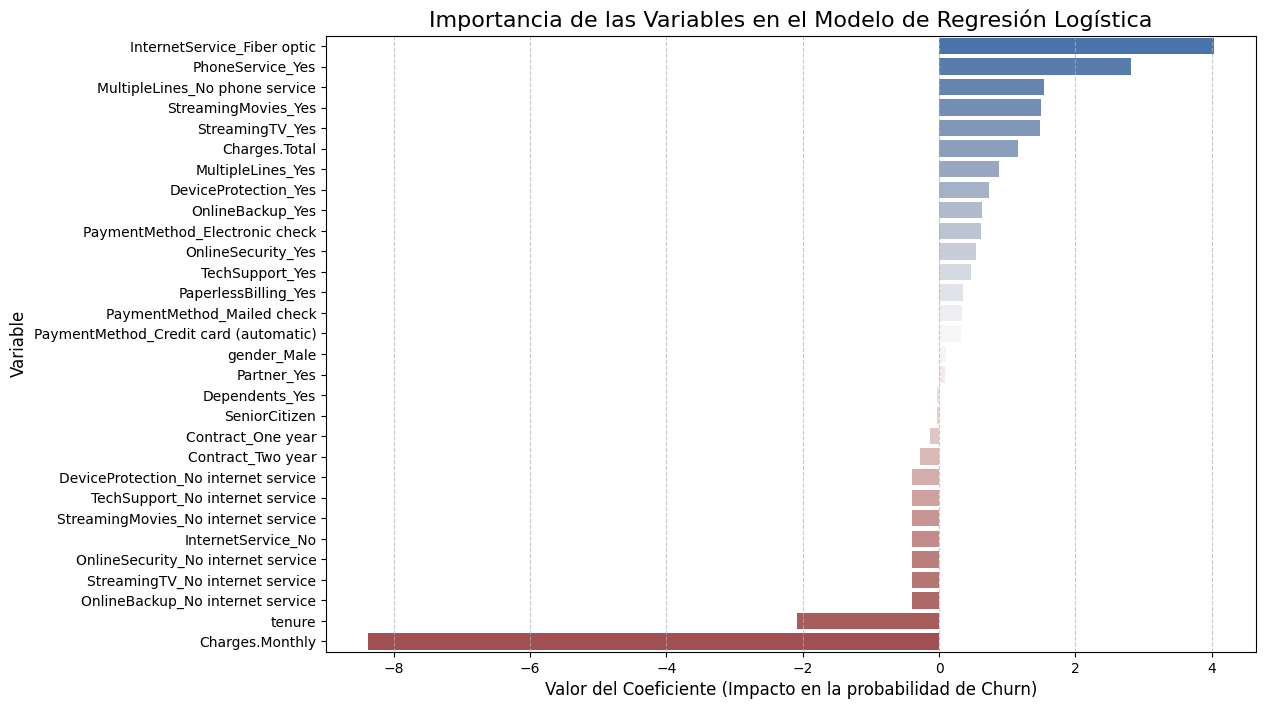

In [ ]:
# Análisis de la Importancia de las Variables
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Obtener los coeficientes del modelo de Regresión Logística
#    Los coeficientes están en 'log_reg.coef_[0]' porque es un problema de clasificación binaria.
coefficients = log_reg.coef_[0]

# 2. Crear un DataFrame para asociar cada coeficiente con su respectiva variable
#    Las columnas provienen de nuestro conjunto de datos de entrenamiento (X_train_scaled).
feature_importance = pd.DataFrame({'Variable': X_train_scaled.columns, 'Coeficiente': coefficients})

# 3. Ordenar el DataFrame por el valor absoluto del coeficiente para ver las más influyentes
#    Usamos 'abs' para identificar las variables más impactantes, ya sea positiva o negativamente.
feature_importance['Impacto Absoluto'] = feature_importance['Coeficiente'].abs()
feature_importance = feature_importance.sort_values(by='Impacto Absoluto', ascending=False)

# 4. Imprimir las 10 variables más importantes
print("--- Top 10 Variables más Influyentes en la Predicción de Churn (según Regresión Logística) ---")
display(feature_importance.head(10))

# 5. Visualizar la importancia de las variables para una mejor interpretación
plt.figure(figsize=(12, 8))
# Usamos el DataFrame ordenado por el coeficiente original para ver el signo (positivo/negativo)
top_20_features = feature_importance.sort_values(by='Coeficiente', ascending=False).head(20)

sns.barplot(x='Coeficiente', y='Variable', data=feature_importance.sort_values(by='Coeficiente', ascending=False), palette='vlag')
plt.title('Importancia de las Variables en el Modelo de Regresión Logística', fontsize=16)
plt.xlabel('Valor del Coeficiente (Impacto en la probabilidad de Churn)', fontsize=12)
plt.ylabel('Variable', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


--- Top 10 Variables más Influyentes (según Random Forest) ---


,Variable,Importancia
3,Charges.Total,0.168428
1,tenure,0.157613
2,Charges.Monthly,0.136748
28,PaymentMethod_Electronic check,0.099432
10,InternetService_Fiber optic,0.060930
26,PaperlessBilling_Yes,0.040301
25,Contract_Two year,0.033463
4,gender_Male,0.023025
9,MultipleLines_Yes,0.021545
21,StreamingTV_Yes,0.019208


/tmp/ipython-input-27-3619097177.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Variable', data=rf_feature_importance.head(15), palette='summer')


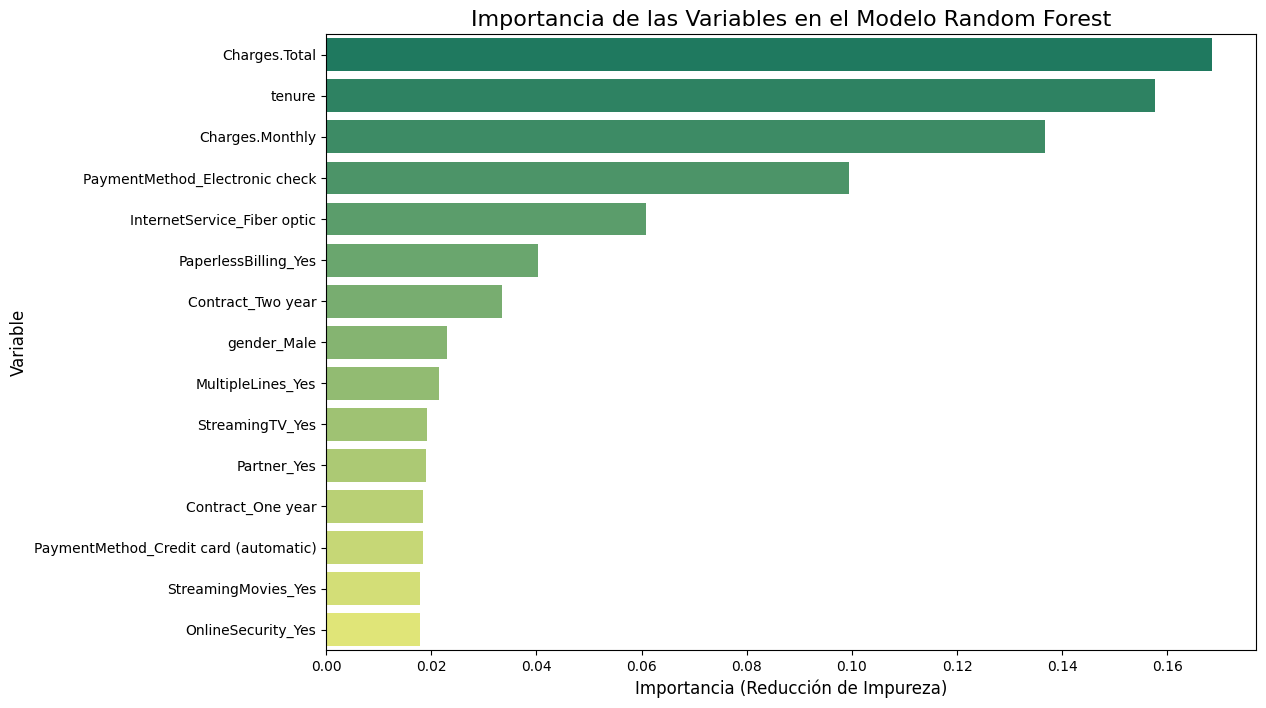

In [ ]:
# --- Análisis de Importancia con Random Forest (Más robusto ante multicolinealidad) ---

# 1. Obtener la importancia de las variables del modelo Random Forest entrenado
rf_importances = random_forest.feature_importances_

# 2. Crear un DataFrame para una fácil visualización
rf_feature_importance = pd.DataFrame({'Variable': X_train_scaled.columns, 'Importancia': rf_importances})
rf_feature_importance = rf_feature_importance.sort_values(by='Importancia', ascending=False)

# 3. Imprimir las 10 variables más importantes según Random Forest
print("\n--- Top 10 Variables más Influyentes (según Random Forest) ---")
display(rf_feature_importance.head(10))

# 4. Visualizar la importancia
plt.figure(figsize=(12, 8))
sns.barplot(x='Importancia', y='Variable', data=rf_feature_importance.head(15), palette='summer')
plt.title('Importancia de las Variables en el Modelo Random Forest', fontsize=16)
plt.xlabel('Importancia (Reducción de Impureza)', fontsize=12)
plt.ylabel('Variable', fontsize=12)
plt.show()